In [497]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc-house-sales/house_data.csv


In [498]:
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import warnings
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
style.use('ggplot')
%matplotlib inline

In [499]:
pd.set_option('display.max_column',21)

# Load Data

In [500]:
H_Sales = pd.read_csv('../input/kc-house-sales/house_data.csv')

In [501]:
H_Sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [502]:
H_Sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [503]:
H_Sales.shape

(21613, 21)

In [504]:
H_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- Data has float, integer, and object type values.
- Data type of timeStamp is object that need to conver to datetime.

In [505]:
#To suppress scientific notation 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Generate descriptive statistics

Lets summarize the central tendency, dispersion and shape of a dataset's distribution

In [506]:
H_Sales.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00000,4580301520.86499,2876565571.31206,1000102.00000,2123049194.00000,3904930410.00000,7308900445.00000,9900000190.00000
price,21613.00000,540088.14177,367127.19648,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
floors,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,21613.00000,0.00754,0.08652,0.00000,0.00000,0.00000,0.00000,1.00000
view,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000


# Data Cleaning

#### Categorical vs Continuous Features

In [507]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
H_Sales.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

#### Below are the category of the features:

##### Qualitative Features:

- date - Qualitative Features
- Categorical Features:

- floors - Categorical Nominal feature
- waterfront - Categorical Nominal feature
- view - Categorical Ordinal feature
- condition - Categorical Ordinal feature
- grade - Categorical Ordinal feature
- bedrooms - Categorical Nominal feature
- bathrooms - Categorical Nominal feature
##### Quantitative Features:

- Rest all are Quantitative Features.

#### Find and remove null values

In [508]:
#checking and removing null data
H_Sales.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In the dataset, there are no missing values. It is not necessary for missing values to be present in the dataset in the form of NA, NAN, Zeroes, and so on; they could be represented by other values that can be explored by analyzing each feature.

In [509]:
H_Sales.shape

(21613, 21)

In [510]:
#checking for duplicate values
H_Sales.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [511]:
#removing duplicates by checking the IDs
H_Sales.drop_duplicates(subset='id', keep='first', inplace=False, ignore_index=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [512]:
H_Sales.shape

(21613, 21)

In [513]:
#Dropping columns 'id','lat','long','zipcode'
H_Sales = H_Sales.drop(['id','lat','long','zipcode'], axis=1)

In [514]:
H_Sales.shape

(21613, 17)

In [515]:
#Create a function to return the outliers
def detect_outliers(x, c = 1.5):
    q1, q3 = np.percentile(x, [25,75])
    #print("q1 - ",q1, " q3 - ", q3)
    
    iqr = (q3 - q1)
    #print("iqr --", iqr)
    
    lob = q1 - (iqr * c)
    #print("lob - ",lob)
    
    uob = q3 + (iqr * c)
    #print("uob - ",uob)
    
    # Generate outliers
    gen = np.where((x > uob) | (x < lob))

    return gen

In [516]:
# Detect all Outliers 
priceOutliers = detect_outliers(H_Sales['price'])
print("Total Outliers count : ",len(priceOutliers[0]))

Total Outliers count :  1146


In [517]:
# Remove outliers
df = H_Sales.drop(priceOutliers[0])

In [518]:
H_Sales.shape

(21613, 17)

# Exploratory Data Analysis

#### Lets find out top 10 features which are highly correlaed with price.

In [519]:
df.corr()['price'].sort_values(ascending=False).head(10)

price           1.00000
grade           0.63118
sqft_living     0.62233
sqft_living15   0.56209
sqft_above      0.53045
bathrooms       0.45593
bedrooms        0.29696
floors          0.27399
view            0.23827
sqft_basement   0.23570
Name: price, dtype: float64

In [520]:
H_Sales.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

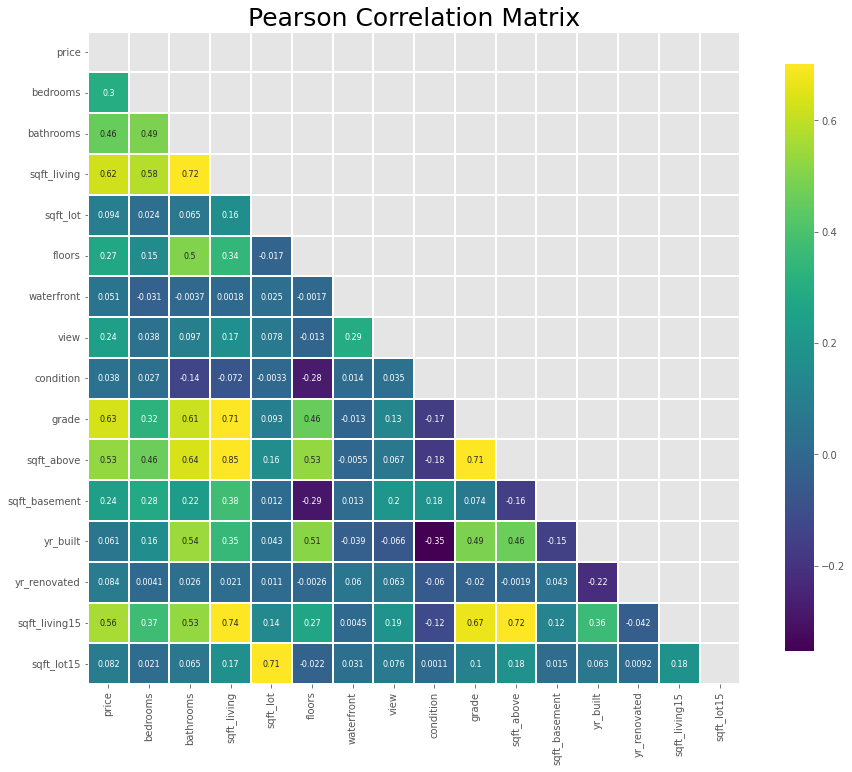

In [521]:
# Creating a correlation plot 
features = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="viridis",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

plt.show()

There is a high correlation between sqft_living, grade, sqft_above, sqft_living15 , bathrooms, view , sqft_basement, bedrooms with price. It seems that there is a positive linear relationship between the two. Going by general trend an increase in living space will lead to increase in price from this we can see year renovated has tHe low correlation

In [522]:
# Checking the correlation of Price with other features
price_corr = homes_corr.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.00000
sqft_living      0.83609
grade            0.80001
sqft_living15    0.79260
sqft_above       0.71805
bathrooms        0.67430
bedrooms         0.49075
view             0.40916
floors           0.34448
sqft_basement    0.31315
yr_built         0.18637
waterfront       0.11640
yr_renovated    -0.05725
condition       -0.23920
sqft_lot15      -0.24254
sqft_lot        -0.24278
Name: price, dtype: float64


# Feature Engineering for Date

In [523]:
H_Sales['date'] = pd.to_datetime(H_Sales['date'])
H_Sales['month'] = H_Sales['date'].dt.month_name().str[:3]
H_Sales['year']=H_Sales['date'].apply(lambda date:date.year)

### Relationships between the explanatory variables 

In [524]:
Features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','sqft_lot15']

In [525]:
H_Sales_Features = H_Sales.loc[:, Features]
H_Sales_Features .head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062
3,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503


In [526]:
abs(H_Sales_Features.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False


In [527]:
# saving the absolute value of correlation matrix as a data frame
H_Sales =H_Sales_Features.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns in a new column
H_Sales['High Corr'] = list(zip(H_Sales.level_0, H_Sales.level_1))
#set the index
H_Sales.set_index(['High Corr'], inplace = True)
#d rop level colums
H_Sales.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
H_Sales.columns = ['cc']
# dropped the dublicates
H_Sales.drop_duplicates(inplace=True)

H_Sales[(H_Sales.cc>.75) & (H_Sales.cc<1)]

,cc
High Corr,
"(sqft_above, sqft_living)",0.87660
"(grade, sqft_living)",0.76270
"(sqft_living15, sqft_living)",0.75642
"(grade, sqft_above)",0.75592
"(bathrooms, sqft_living)",0.75467


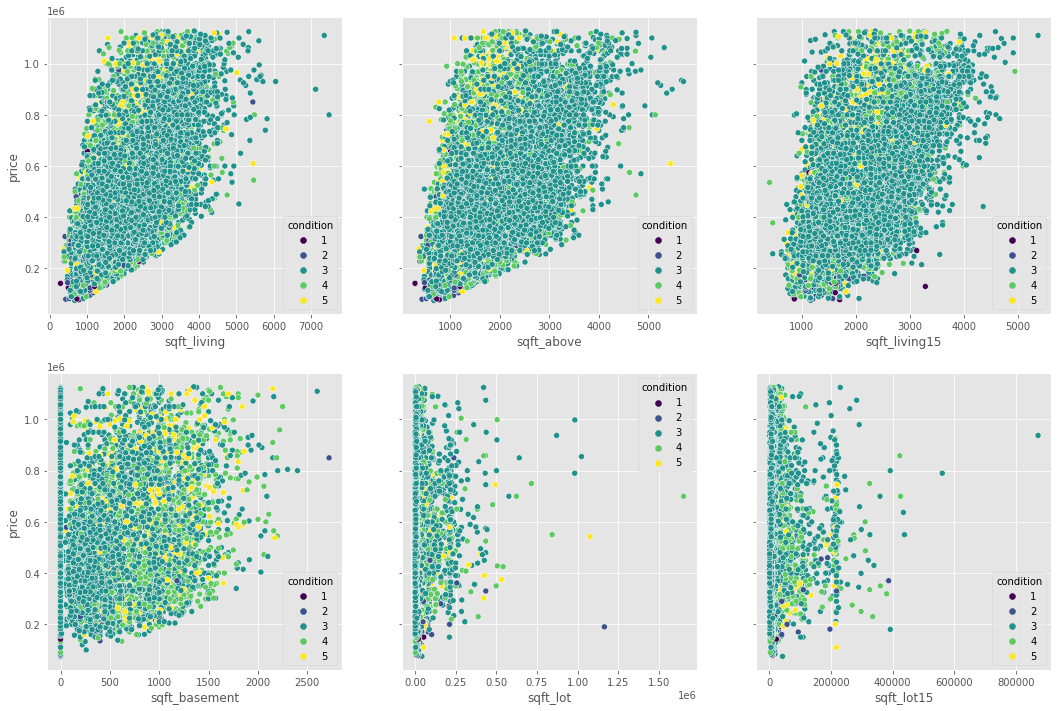

In [528]:
fig, axs = plt.subplots( nrows=2, ncols=3, sharey=True, figsize=(18,12))

sns.scatterplot(y='price',x='sqft_living',data=df, hue='condition', palette='viridis', ax=axs[0,0])
sns.scatterplot(y='price',x='sqft_above',data=df, hue='condition', palette='viridis', ax=axs[0,1])
sns.scatterplot(y='price',x='sqft_living15',data=df, hue='condition', palette='viridis', ax=axs[0,2])
sns.scatterplot(y='price',x='sqft_basement',data=df, hue='condition', palette='viridis', ax=axs[1,0])
sns.scatterplot(y='price',x='sqft_lot',data=df, hue='condition', palette='viridis', ax=axs[1,1])
sns.scatterplot(y='price',x='sqft_lot15',data=df, hue='condition', palette='viridis', ax=axs[1,2])
plt.show()

There appears to be a strong positive correlation between sqft living, sqft above, and sqft living15 and price. This is not the case for sqft basement, sqft lot, and sqft lot15. It is self-evident that larger houses are more expensive. The graphs also show that the majority of houses lack a basement and land space, despite the fact that the price does not increase linearly with larger basement and land space. I discovered that sqft living is the sum of sqft above and sqft basement.

sqft living  =  sqft above + sqft basement.

# Does the view have any impact on the Prices

In [529]:
#plt.figure(figsize= (12,8))
#plt.scatter(H_Sales['sqft_living'], H_Sales['price'])
#plt.ylabel('Sales Price ($)')
#plt.xlabel('Square Feet')
#plt.show()


# Does  the Grade have any impact on the house price ?

KeyError: 'grade'

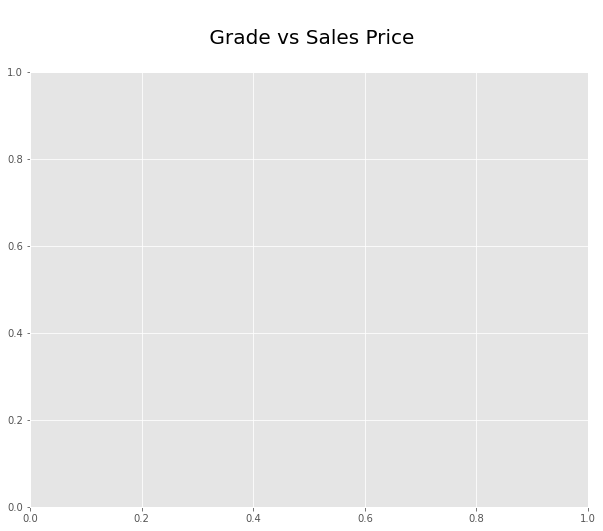

In [530]:
plt.figure(figsize= (10,8))
plt.title("\n Grade vs Sales Price\n",fontsize=20)
plt.scatter(H_Sales['grade'], H_Sales['price'])
plt.ylabel('Sales Price ($)',fontsize=15)
plt.xlabel('Grade',fontsize=15)
plt.show()

# Does the waterfront property have any impact on the house price ?

ValueError: Could not interpret input 'month'

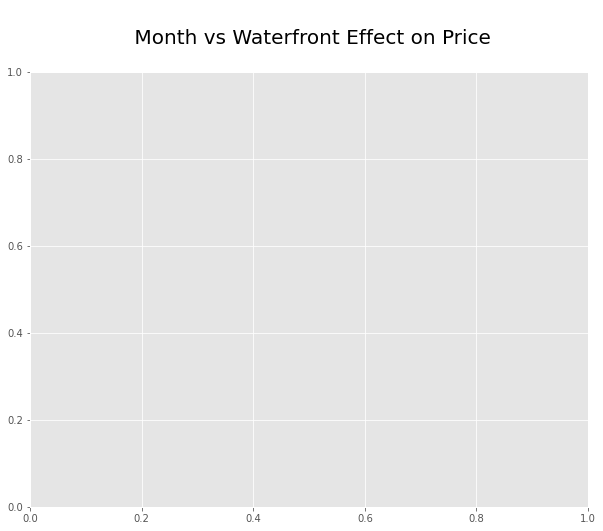

In [531]:
plt.figure(figsize= (10,8))
plt.title("\n Month vs Waterfront Effect on Price\n",fontsize=20)
sns.barplot(y='price',x='month',data=H_Sales, hue='waterfront', palette='magma')
plt.ylabel('Sales Price in Millions($)', fontsize=15)
plt.xlabel('Waterfront', fontsize=15)
plt.show()

KeyError: 'year'

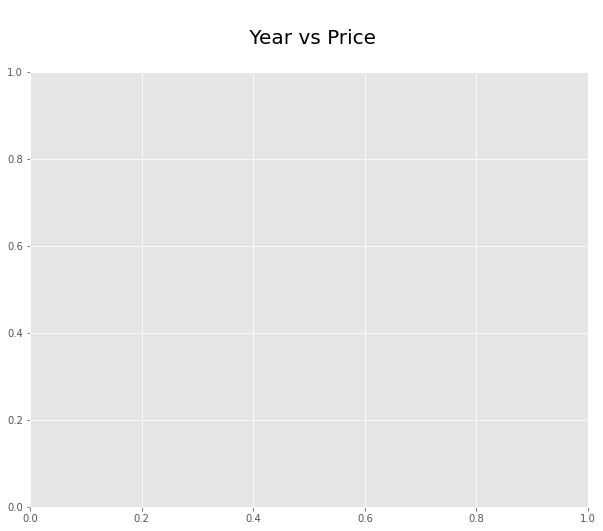

In [532]:
#Use the function boxplot in the seaborn library to compare the sale for 2014 and 2015
plt.figure(figsize= (10,8))
plt.title("\n Year vs Price\n",fontsize=20)
sns.boxplot(H_Sales['year'], H_Sales['price'])
plt.ylabel('Sales Price in Millions ($)',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.show()

In [533]:
# checking price and bedrooms relationship
plt.figure(figsize= (12,8))
sns.boxplot(x='bedrooms', y='price', data=H_Sales);

ValueError: Could not interpret input 'bedrooms'

<Figure size 864x576 with 0 Axes>

In [ ]:
plt.figure(figsize= (10,8))
plt.scatter(H_Sales['bathrooms'], H_Sales['price'])
plt.ylabel('Sales Price ($)',fontsize=15)
plt.xlabel('Number of Bathrooms',fontsize=15)
plt.show()

Most of the houses have bathrooms bwtween 1-4 with varid price range. The distribution of price becomes more as the number of bathrooms increase as seen with increase in no of rooms. There are some outliers where the price is really high.

For 7.5 bathrooms there is only 1 price- possibly only one entry in the data.

In [ ]:
H_Sales.groupby('month').mean()['price']

In [ ]:
#Visualize the average House prices and months
fig, ax = plt.subplots(figsize=(12, 5))
plt.title("\n Month Average Price\n",fontsize=20)
H_Sales.groupby('month').mean()['price'].plot()
plt.show()

#### we can see the house prices decreses at the end of the year an it peck the the summer months

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.title("\n Year Average Price\n",fontsize=20)
H_Sales.groupby('year').mean()['price'].plot(kind='line')
plt.show()

In [ ]:
#Creating a count plot for no of floor
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x="floors", data=H_Sales,  order = H_Sales['floors'].value_counts().index, palette="Paired")
plt.show()

In [ ]:
#Creating a distriution plot 
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(H_Sales['price'])
plt.show()

In [ ]:
H_Sales.loc[H_Sales['bedrooms'] > 12, 'bedrooms'] = 3

In [ ]:
#check the distributions of each of the columns
H_Sales.drop(columns=['date']).hist(figsize=(18,16));
plt.tight_layout()

In [ ]:
#Creating a count plot for grade given to different appartments
plt.figure(figsize=(12,8))
sns.countplot(x="grade", data=H_Sales,  order = H_Sales['grade'].value_counts().index, palette="Paired")

### OLS REGRSSION ON NUMERICAL VARIABLES USING STATMODEL

### Assumptions
1. Linearrity:The relationship between  X and the mean y is linear
2. Normality: Normal distribution
3. Homoscedasticty: Variance of the residual is the same  for any value of X
4. independence: obsevartions are independent of each other


In [ ]:
 #Lets look at some regressions for all of my chosen columns

# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

# I don't need to see regression analysis for all of my variables
cols = [ 'bedrooms','sqft_above', 'grade','sqft_living',]

results = []
for idx, column in enumerate(cols):
    
    print((column.upper() + " ") * 5)
    print (f"Housing Data - Regression Analysis and Diagnostics for Price~{column}")
    
    f = f'price~{column}'  # create my model formula
    model = smf.ols(formula=f, data=H_Sales).fit()  # fit the model
    print(model.summary())
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

result_df = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])
result_df.sort_values(by='r_squared')

### OLS REGRSSION ON CATOGERICAL VARIABLES

In [ ]:

# I don't need to see regression analysis for all of my variables
cols2 = [ 'condition','yr_renovated','waterfront', 'view',]

results = []
for idx, column in enumerate(cols2):
    
    print((column.upper() + " ") * 5)
    print (f"Housing Data - Regression Analysis and Diagnostics for Price~{column}")
    
    f = f'price~{column}'  # create my model formula
    model = smf.ols(formula=f, data=H_Sales).fit()  # fit the model
    print(model.summary())
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

result_df = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])
result_df.sort_values(by='r_squared')

### With the expection of the view, most of the r-squared values was below 0.05, the "view"had a r-squared value  of 0.15. The near zero p-value for all four variables shows it is extremely likely that the variables are correlated with price.